In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
files=os.listdir("./data/results")

In [3]:
grid = [s for s in files if "grid" in s] # files with results for grid search
random = [s for s in files if "random" in s] 
group = [s for s in files if "group" in s] 

In [4]:
grid_df=pd.DataFrame([])
for file in grid:
    print("reading:", file)
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num']=1
    df.loc[df['experiment_name']!='default params', 
           'iter_num'] = range(1, df.loc[df['experiment_name']!='default params'].shape[0]+1)
    
    grid_df = pd.concat([grid_df, df], sort=False)
    #print("grid_df shape: ", grid_df.shape) #729 grid run and 1 default

    
print("===============================")
group_df=pd.DataFrame([])
for file in group:
    print("reading:", file)
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num'] = range(1, df.shape[0]+1)
    
    group_df = pd.concat([group_df, df], sort=False)
    #print("group_df shape: ", group_df.shape)
    
print("===============================")
random_df=pd.DataFrame([])
for file in random:
    print("reading:", file)
    df = pd.read_csv("./data/results/"+file)
    
    df['iter_num'] = range(1, df.shape[0]+1)
    
    random_df = pd.concat([random_df, df], sort=False)
    #print("random_df shape: ", random_df.shape)
   

reading: xgboost_perfomance_grid_search_GPU.csv
reading: xgboost_perfomance_group_search_GPU_8.csv
reading: xgboost_perfomance_group_search_GPU_3.csv
reading: xgboost_perfomance_group_search_GPU_1.csv
reading: xgboost_perfomance_group_search_GPU_9.csv
reading: xgboost_perfomance_group_search_GPU_7.csv
reading: xgboost_perfomance_group_search_GPU_10.csv
reading: xgboost_perfomance_group_search_GPU_5.csv
reading: xgboost_perfomance_group_search_GPU_4.csv
reading: xgboost_perfomance_group_search_GPU_2.csv
reading: xgboost_perfomance_group_search_GPU_6.csv
reading: xgboost_perfomance_random_search_GPU_5.csv
reading: xgboost_perfomance_random_search_GPU_6.csv
reading: xgboost_perfomance_random_search_GPU_2.csv
reading: xgboost_perfomance_random_search_GPU_7.csv
reading: xgboost_perfomance_random_search_GPU_4.csv
reading: xgboost_perfomance_random_search_GPU_3.csv
reading: xgboost_perfomance_random_search_GPU_8.csv
reading: xgboost_perfomance_random_search_GPU_10.csv
reading: xgboost_perfoma

In [5]:
df = pd.concat([grid_df, group_df, random_df], sort=False)

In [6]:
grid_time = 1940.05

random_time = [2073.10, 1991.44, 1941.67,
               3461.88, 3418.30, 3504.44, 3471.46, 3547.54, 3482.61
              ]


groups_time = [
    [810.24, 765.14, 742.56, 744.10, 749.14, 
     676.46, 702.35, 749.01, 715.88, 677.28],
    [515.27, 518.78, 519.46, 520.49, 520.53, 
     491.02, 495.51, 497.50, 498.53, 489.28],
    [521.28, 521.50, 522.18, 525.42, 526.47, 
     495.62, 499.08, 499.29, 500.98, 491.89]
]#first, second and third groups

default_time = 2.02

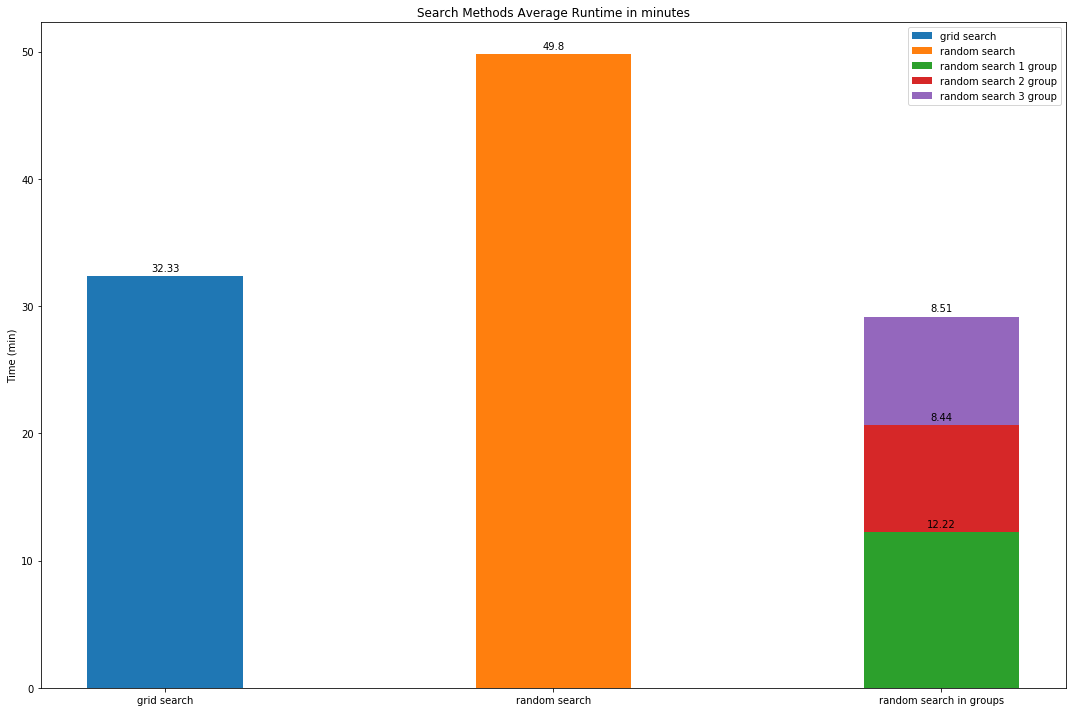

In [7]:
def autolabel(rects, add=0):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()+add
        ax.annotate('{}'.format(round(height-add,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
x = [0,0.5,1]  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

labels=['grid search','random search', 'random search in groups']

rects1 = ax.bar(0, grid_time/60, width, label='grid search')
rects2 = ax.bar(0.5, np.mean(random_time)/60, width, label='random search')


groups_time_mean = np.mean(groups_time, axis =1)/60
rects3_1 = ax.bar(1, groups_time_mean[0], width, label='random search 1 group')
rects3_2 = ax.bar(1, groups_time_mean[1], width,
             bottom=groups_time_mean[0], label='random search 2 group')
rects3_3 = ax.bar(1, groups_time_mean[2], width,
             bottom=groups_time_mean[0] + groups_time_mean[1], 
                  label='random search 3 group')


ax.set_ylabel('Time (min)')
ax.set_title('Search Methods Average Runtime in minutes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='best')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3_1)
autolabel(rects3_2, groups_time_mean[0])
autolabel(rects3_3, groups_time_mean[0]+groups_time_mean[1])
fig.tight_layout()

plt.savefig("graphs/1_time_exec.jpg")
plt.show()

In [8]:
top5=df.loc[:,['experiment_name','params','mean_test_score']].sort_values(by='mean_test_score',ascending=False)[:5]

In [9]:
top5

,experiment_name,params,mean_test_score
718,random search for 3 group,"{'colsample_bytree': 0.7726166520388937, 'subs...",0.669707
611,random search for 3 group,"{'colsample_bytree': 0.6377829940262529, 'subs...",0.668893
494,random search for 3 group,"{'colsample_bytree': 0.8561761903119284, 'subs...",0.668684
489,random search for 3 group,"{'colsample_bytree': 0.5791399443148867, 'subs...",0.667752
234,random search,"{'alpha': 0.8252577014252843, 'colsample_bytre...",0.667675


In [10]:
for elem in top5.loc[:,'params']:
    print(elem)

{'colsample_bytree': 0.7726166520388937, 'subsample': 0.8394542128507747}
{'colsample_bytree': 0.6377829940262529, 'subsample': 0.8194911486224106}
{'colsample_bytree': 0.8561761903119284, 'subsample': 0.8305738637937383}
{'colsample_bytree': 0.5791399443148867, 'subsample': 0.8404365616343767}
{'alpha': 0.8252577014252843, 'colsample_bytree': 0.5921825064876262, 'lambda': 0.46766574203901723, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.8231130520928343}


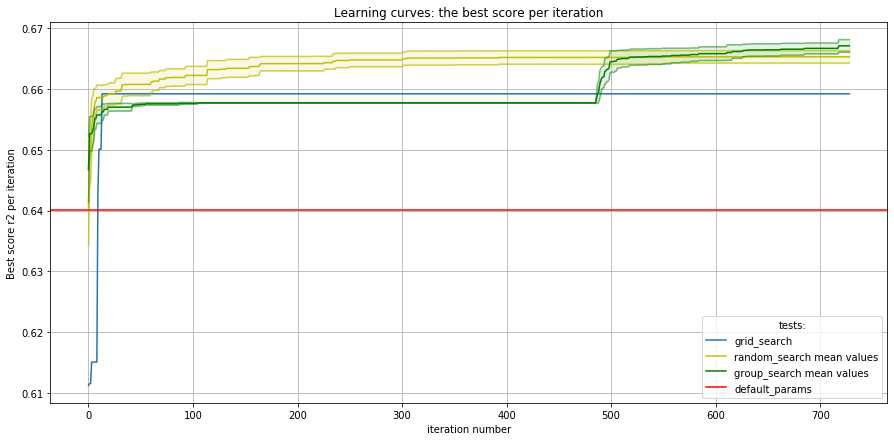

In [11]:
#comparison
# confidence intervals theory get from: 
# https://medium.com/ml-ai-study-group/confidence-interval-confidence-level-be58d250dd40


## GRID_SEARCH
#get best scores per itration for grid_search performance:
grid_perf=grid_df.loc[grid_df['experiment_name']!='default params', 'mean_test_score'].cummax()


## RANDOM_SEARCH
#get best scores per itration for each random_search performance:
random_mean=pd.DataFrame([])
for i in random_df.run_number.unique():
    tmp=pd.DataFrame(random_df.loc[random_df.run_number==i, "mean_test_score"].cummax())
    tmp["iter_num"]=random_df.loc[random_df.run_number==i, "iter_num"]
    random_mean=pd.concat([random_mean, tmp], sort=False)
    
#get mean and confidence interval value for random_search performance on iteration:    

z = 1.96 # for 95% conf interval (coefficient)
# z = 1.64 # for 90% conf interval

n=random_mean.shape[0]/random_mean.iter_num.max() # now n=9, because 4 runs were made for random search
random_std=random_mean.groupby(by="iter_num")['mean_test_score'].std() #std
random_std=(random_std*z)/np.sqrt(n) #confidence interval value 
random_mean=random_mean.groupby(by="iter_num")['mean_test_score'].mean() #mean


## GROUP_SEARCH
#get best scores per itration for each group_search performance (same computations):
group_mean=pd.DataFrame([])
for i in group_df.run_number.unique():
    tmp=pd.DataFrame(group_df.loc[group_df.run_number==i, "mean_test_score"].cummax())
    tmp["iter_num"]=group_df.loc[group_df.run_number==i, "iter_num"]
    group_mean=pd.concat([group_mean, tmp], sort=False)

n=group_mean.shape[0]/group_mean.iter_num.max() # now n=10
group_std=group_mean.groupby(by="iter_num")['mean_test_score'].std()
group_std=(group_std*z)/np.sqrt(n) 
group_mean=group_mean.groupby(by="iter_num")['mean_test_score'].mean()

## DEFAULT performance
default_perf=grid_df.loc[grid_df['experiment_name']=='default params', 'mean_test_score']


## PLOT
plt.figure(figsize=(15,7))
plt.grid()
x=list(range(0, grid_perf.shape[0]))

#grid plot:
plt.plot(x, grid_perf, label="grid_search")

#conf for random:
plt.plot(x, random_mean, color="y", label="random_search mean values")
lower=random_mean - random_std
upper=random_mean + random_std
plt.plot(x, lower, alpha=0.7, color="y")
plt.plot(x, upper, alpha=0.7, color="y")
plt.fill_between(x, lower, upper, alpha=0.1, color="y") 

#conf for group:
plt.plot(x, group_mean, color="green", label="group_search mean values")
lower=group_mean - group_std
upper=group_mean + group_std
plt.plot(x, lower, alpha=0.5, color="green")
plt.plot(x, upper, alpha=0.5, color="green")
plt.fill_between(x, lower, upper, alpha=0.1, color="green")

#line for default values
plt.axhline(default_perf.values, label="default_params", color='r')

plt.legend(title='tests:')
plt.title("Learning curves: the best score per iteration")
plt.ylabel("Best score r2 per iteration")
plt.xlabel("iteration number")
plt.savefig("graphs/2_scores.jpg")
plt.show()

In [12]:
df.experiment_name.unique()

array(['grid search', 'default params', 'random search for 1 group',
       'random search for 2 group', 'random search for 3 group',
       'random search'], dtype=object)

In [13]:
df.loc[df.experiment_name=="grid search", "run_number"]=1

In [14]:
best_scores=df.groupby(by=['experiment_name', 'run_number'])['mean_test_score'].max().reset_index()
print("best scores:")
print(best_scores)

best=pd.merge(df, best_scores, how='inner', on=['experiment_name','run_number','mean_test_score']).loc[:,['experiment_name','mean_test_score', 'params', 'iter_num','run_number']]
#best step and params

best scores:
              experiment_name  run_number  mean_test_score
0                 grid search         1.0         0.659186
1               random search         1.0         0.667099
2               random search         2.0         0.664149
3               random search         3.0         0.666589
4               random search         4.0         0.665909
5               random search         5.0         0.664390
6               random search         6.0         0.663465
7               random search         7.0         0.663906
8               random search         8.0         0.667675
9               random search        10.0         0.664258
10  random search for 1 group         1.0         0.657690
11  random search for 1 group         2.0         0.657690
12  random search for 1 group         3.0         0.657690
13  random search for 1 group         4.0         0.657690
14  random search for 1 group         5.0         0.657690
15  random search for 1 group         6.0  

In [15]:
best_iter=best.groupby(by=['experiment_name', 'run_number'])['iter_num'].min().reset_index()

In [16]:
best_iter

,experiment_name,run_number,iter_num
0,grid search,1.0,14
1,random search,1.0,214
2,random search,2.0,166
3,random search,3.0,306
4,random search,4.0,133
5,random search,5.0,394
6,random search,6.0,517
7,random search,7.0,553
8,random search,8.0,235
9,random search,10.0,94


In [17]:
best_iter.loc[best_iter.experiment_name=="random search for 2 group", "iter_num"]-=(729/3)
best_iter.loc[best_iter.experiment_name=="random search for 3 group", "iter_num"]-=(2*729/3)

In [18]:
best_iter

,experiment_name,run_number,iter_num
0,grid search,1.0,14.0
1,random search,1.0,214.0
2,random search,2.0,166.0
3,random search,3.0,306.0
4,random search,4.0,133.0
5,random search,5.0,394.0
6,random search,6.0,517.0
7,random search,7.0,553.0
8,random search,8.0,235.0
9,random search,10.0,94.0


In [19]:
#params=pd.merge(df, best_iter, how='inner', on=['experiment_name','iter_num','run_number'])
#print(params)
#print(params.params.values)

In [20]:
#params

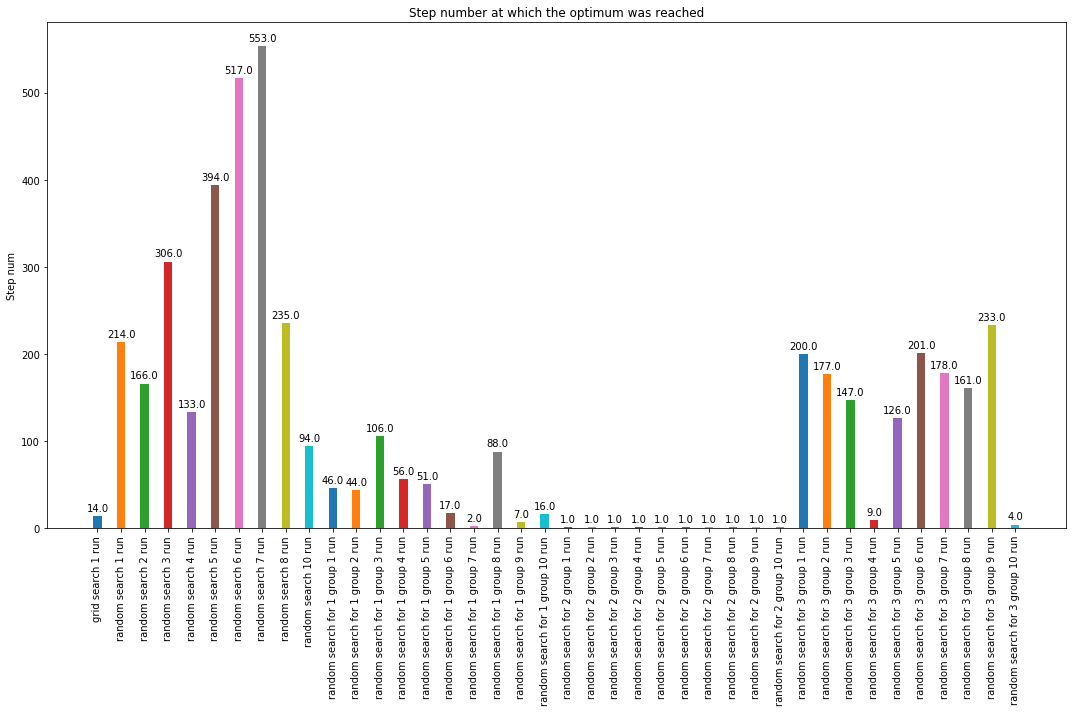

In [25]:
# on which min step algo get best result 
import math
best_iter=best_iter.loc[best_iter['experiment_name']!='default params'].reset_index(drop=True)
x = np.arange(best_iter.shape[0])  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(15,10))

labels_prefix=best_iter.loc[:,'experiment_name']
labels_postfix=best_iter.loc[:,'run_number']
labels=np.sum((labels_prefix.values+" ", labels_postfix.values.astype(int).astype(str)), axis=0)+" run"

rects=[]
for row in range(best_iter.shape[0]):
    rects.append(ax.bar(row, best_iter.loc[row,'iter_num'], width, label=labels[row]))
    autolabel(rects[row])

ax.set_ylabel('Step num')
ax.set_title('Step number at which the optimum was reached')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

fig.tight_layout()

plt.savefig("graphs/3_best_step.jpg")
plt.show()

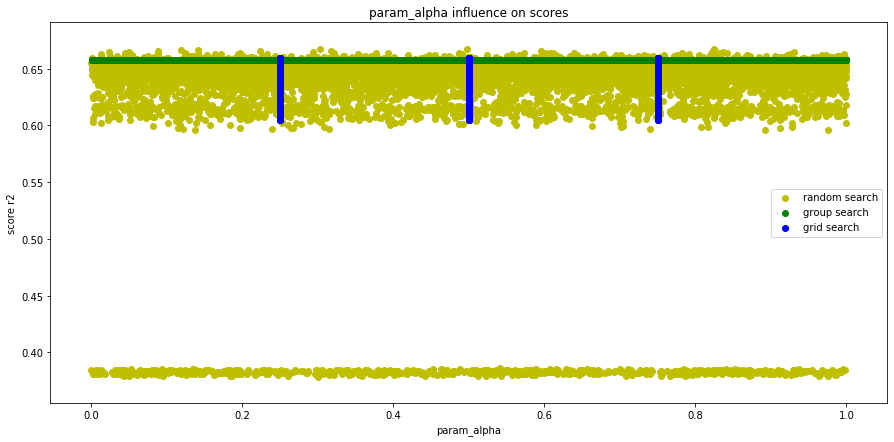

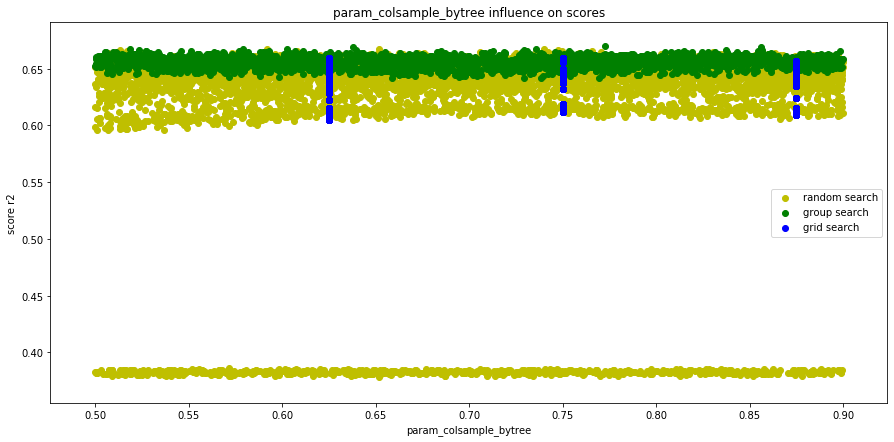

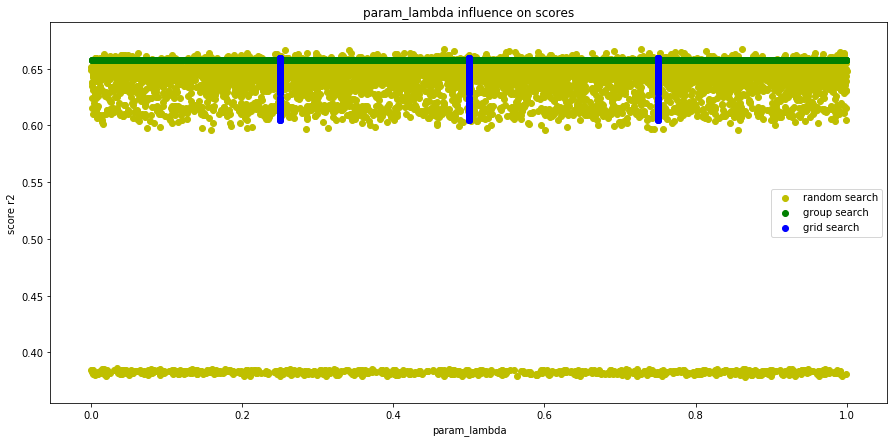

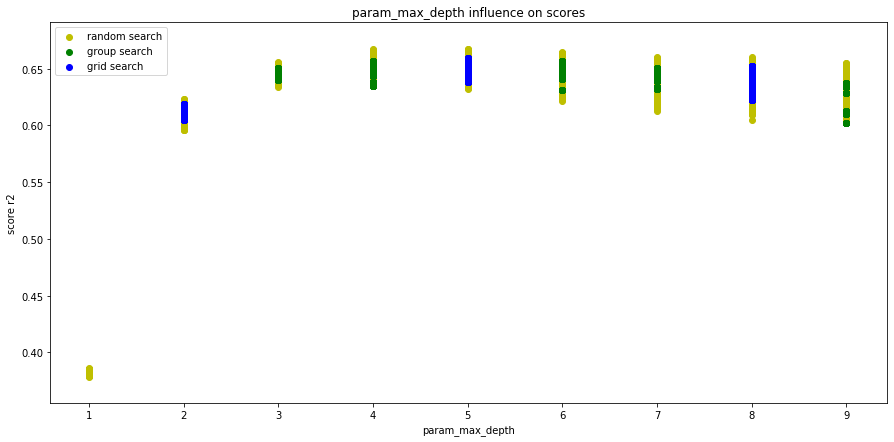

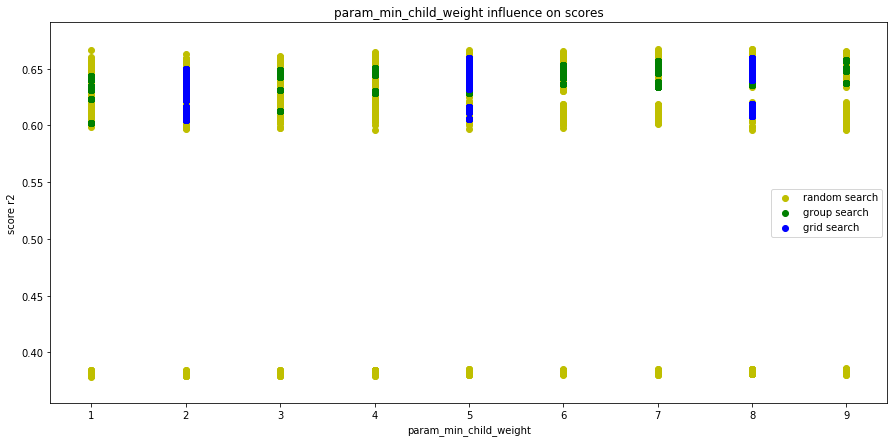

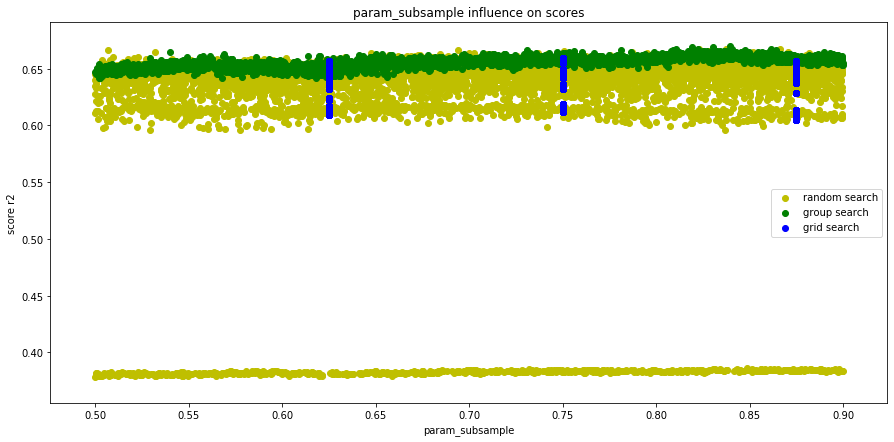

In [22]:
#params influence


params_list=['param_alpha', 'param_colsample_bytree',
       #'param_gamma', 
             'param_lambda', 'param_max_depth',
       'param_min_child_weight', 'param_subsample']

df.loc[df.experiment_name.astype(str).str.contains("group"), "experiment_name"] = "group search"
exp_list = ( "random search", "group search", "grid search")
color_list = ("y","green", "b")
for param in params_list:
    
    plt.figure(figsize=(15,7))
    
    for exp_name, color in zip(exp_list, color_list):            
        data = df.loc[df.experiment_name == exp_name]
        x=data.loc[:,param]
        y=data.loc[:,'mean_test_score']
        plt.scatter(x, y, color = color, label = exp_name)
            
    
    #x=df.loc[:,param]
    #y=df.loc[:,'mean_test_score']
    #plt.scatter(x, y)

    plt.title(param+" influence on scores")
    plt.xlabel(param)
    plt.ylabel("score r2")
    plt.legend()
    plt.savefig("graphs/4 {} influence.jpg".format(param))
    plt.show()